<a href="https://colab.research.google.com/github/Gayathri-Chennupati/database/blob/main/Time_series_forecasting_in_python_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [8]:
df.shape

(847, 2)

In [9]:
print(f"Data range of gold prices avaliable from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

Data range of gold prices avaliable from - 1950-01 to 2020-07


In [10]:
date = pd.date_range (start = '1/1/1950' , end='8/1/2020', freq=' M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [11]:
df['month'] = date
df.drop('Date', axis =1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


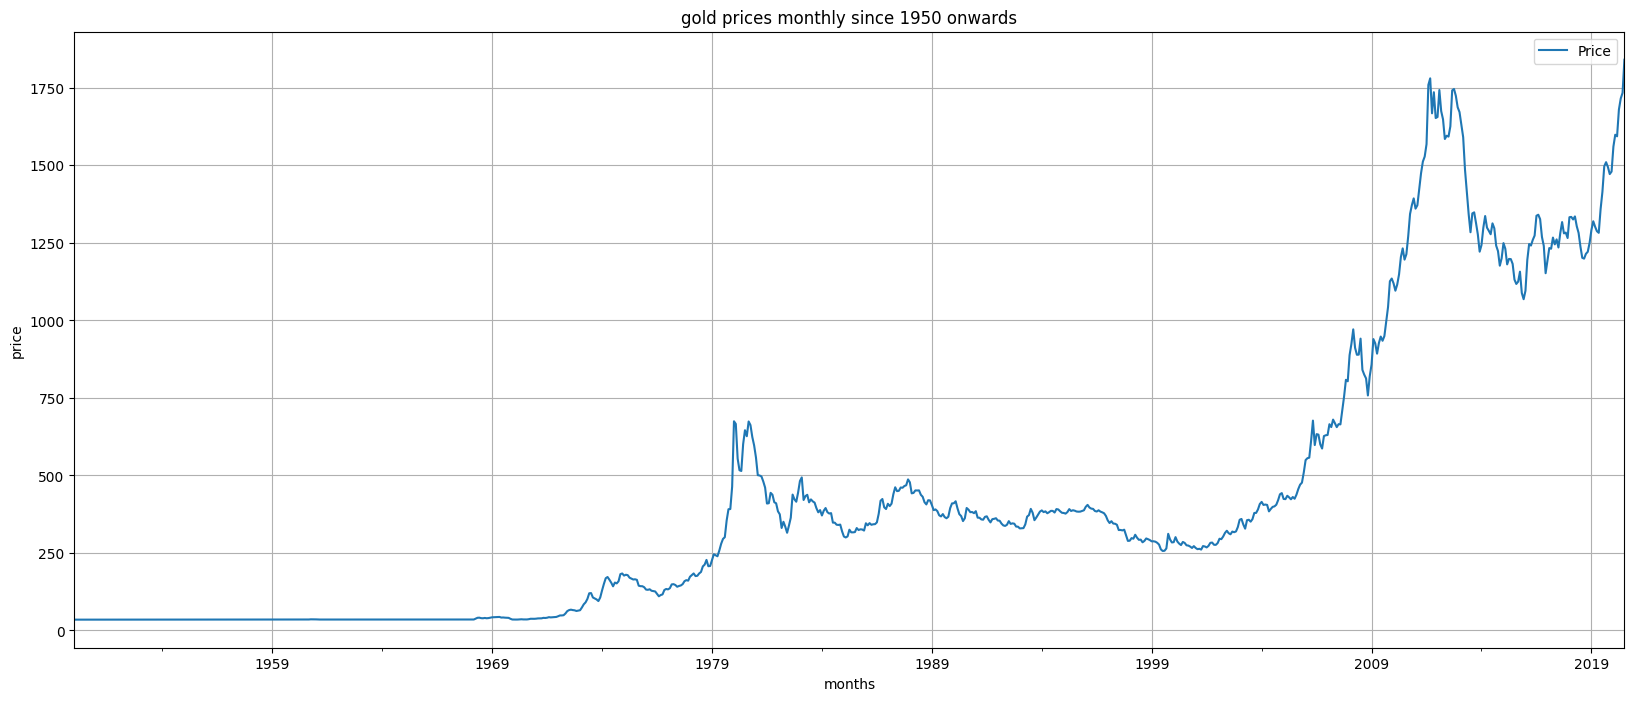

In [12]:
df.plot(figsize=(20,8))
plt.title("gold prices monthly since 1950 onwards")
plt.xlabel("months")
plt.ylabel("price")
plt.grid();

In [13]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


In [13]:
#visual analysis

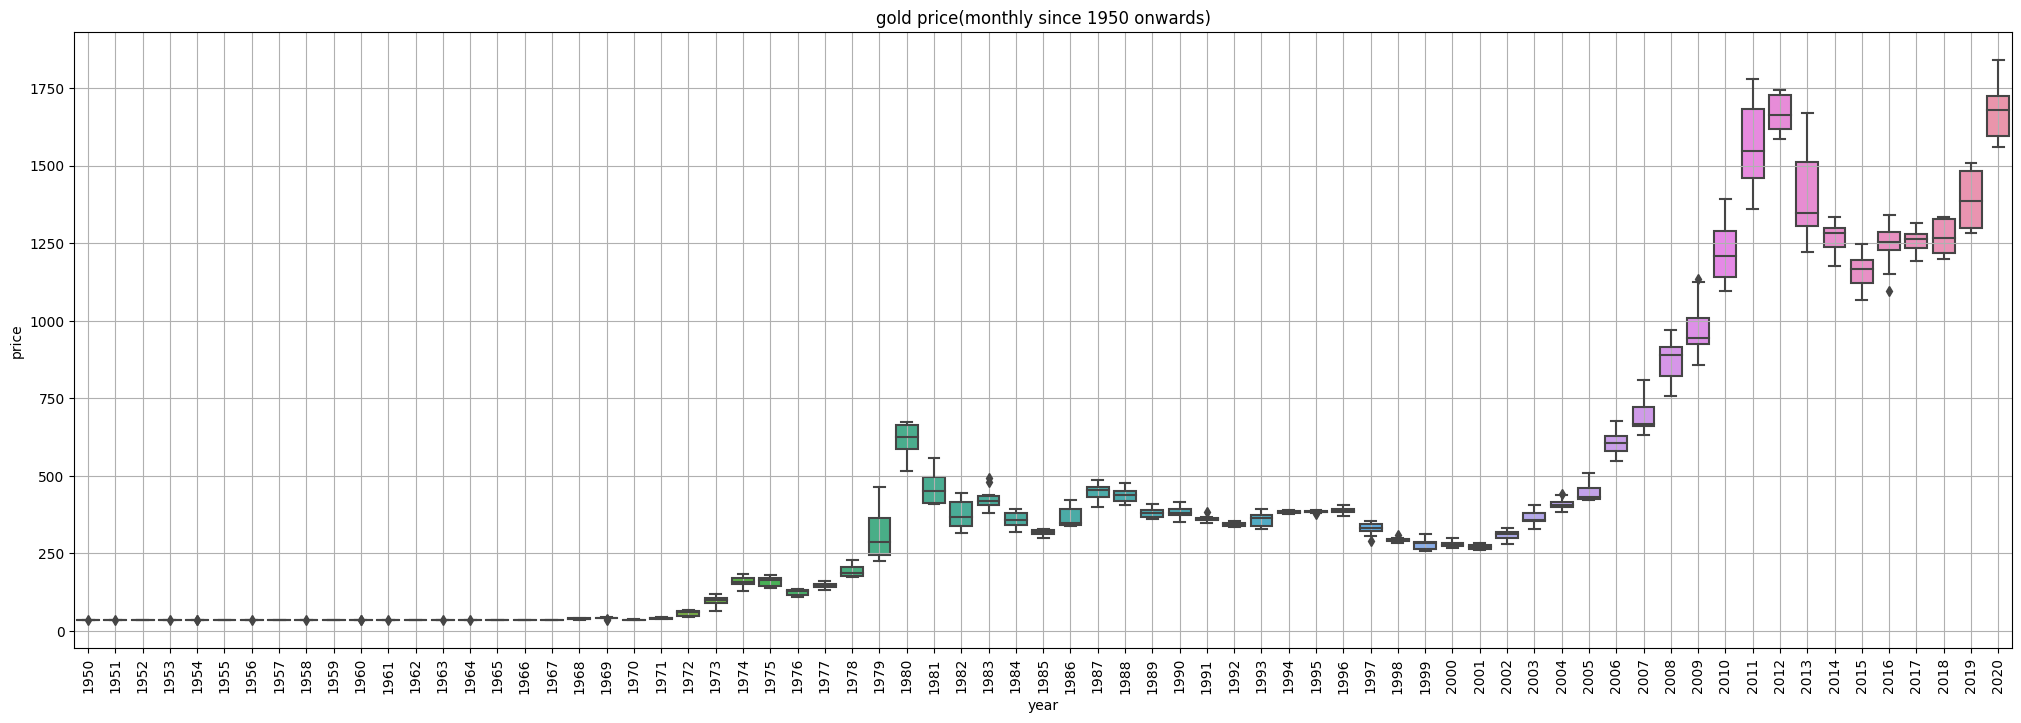

In [14]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title('gold price(monthly since 1950 onwards)')
plt.xlabel('year')
plt.ylabel('price')
plt.xticks(rotation = 90)
plt.grid();

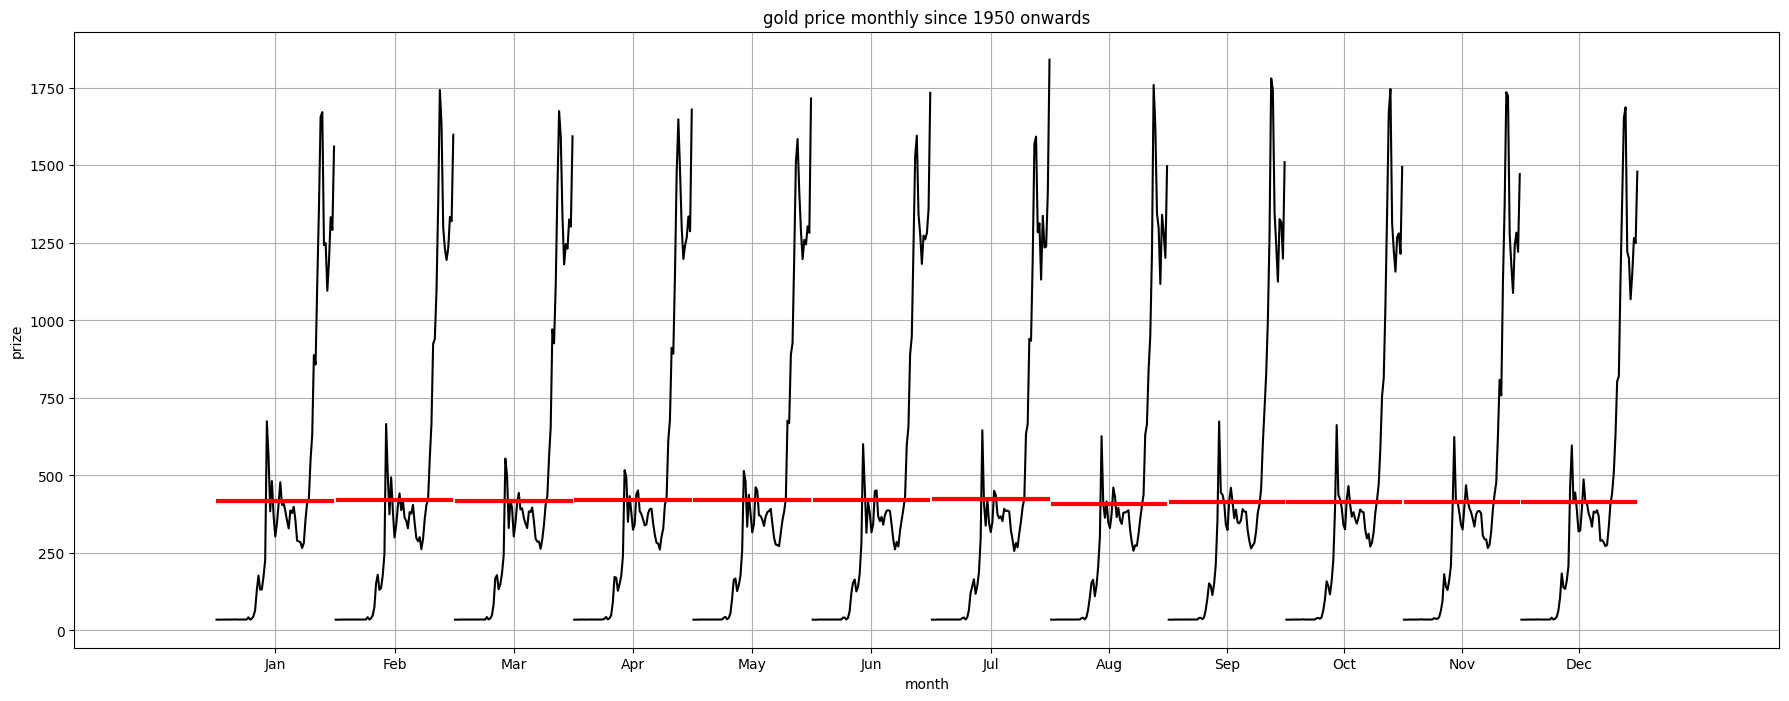

In [15]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22,8))
month_plot(df, ylabel = 'goldprice' , ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('prize')
plt.grid();



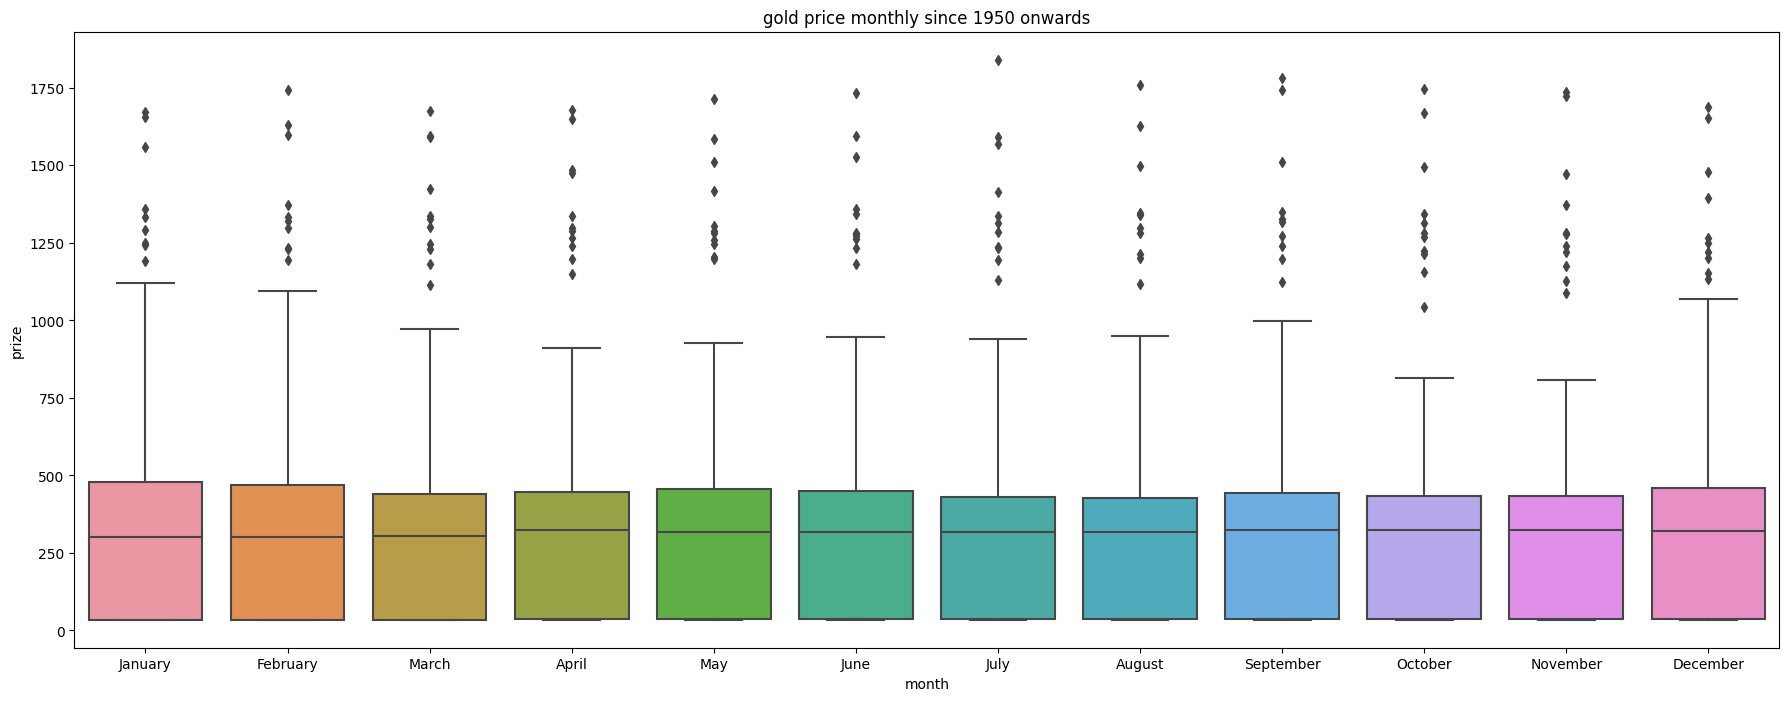

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0],ax=ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('prize')
plt.show();

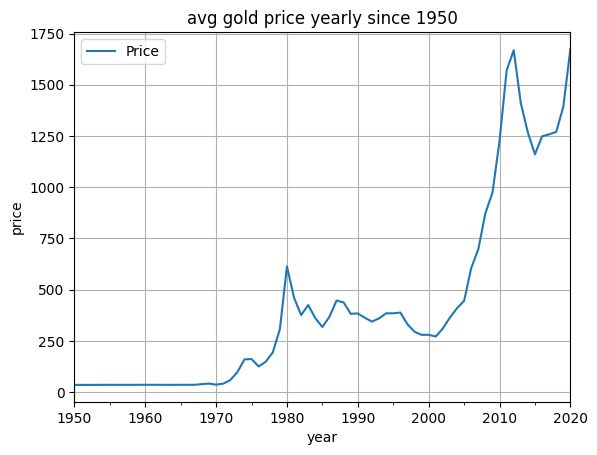

In [17]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

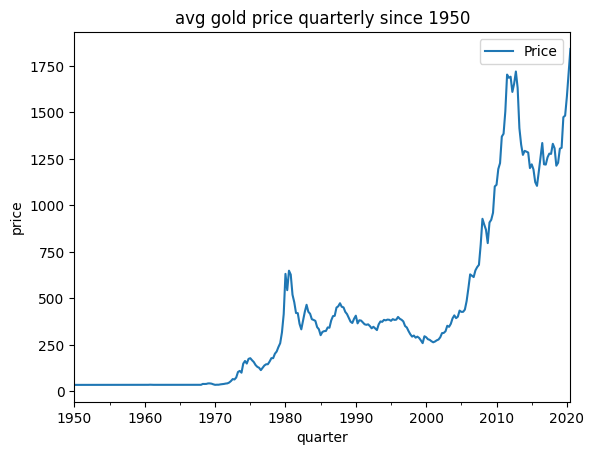

In [18]:
df_quarterly_sum=df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title("avg gold price quarterly since 1950")
plt.xlabel('quarter')
plt.ylabel('price')
plt.show()

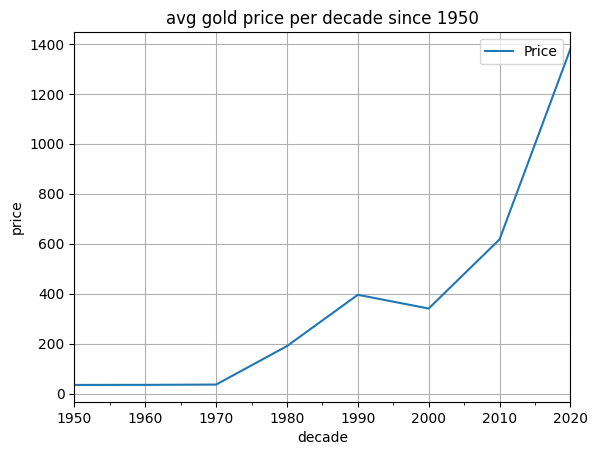

In [19]:
#for decade
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('avg gold price per decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid()

In [20]:
#COEFFICENT VALUES FOR THE PRICES
df_1 = df.groupby(df.index.year).mean().rename(columns={'price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price':'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()

KeyError: ignored

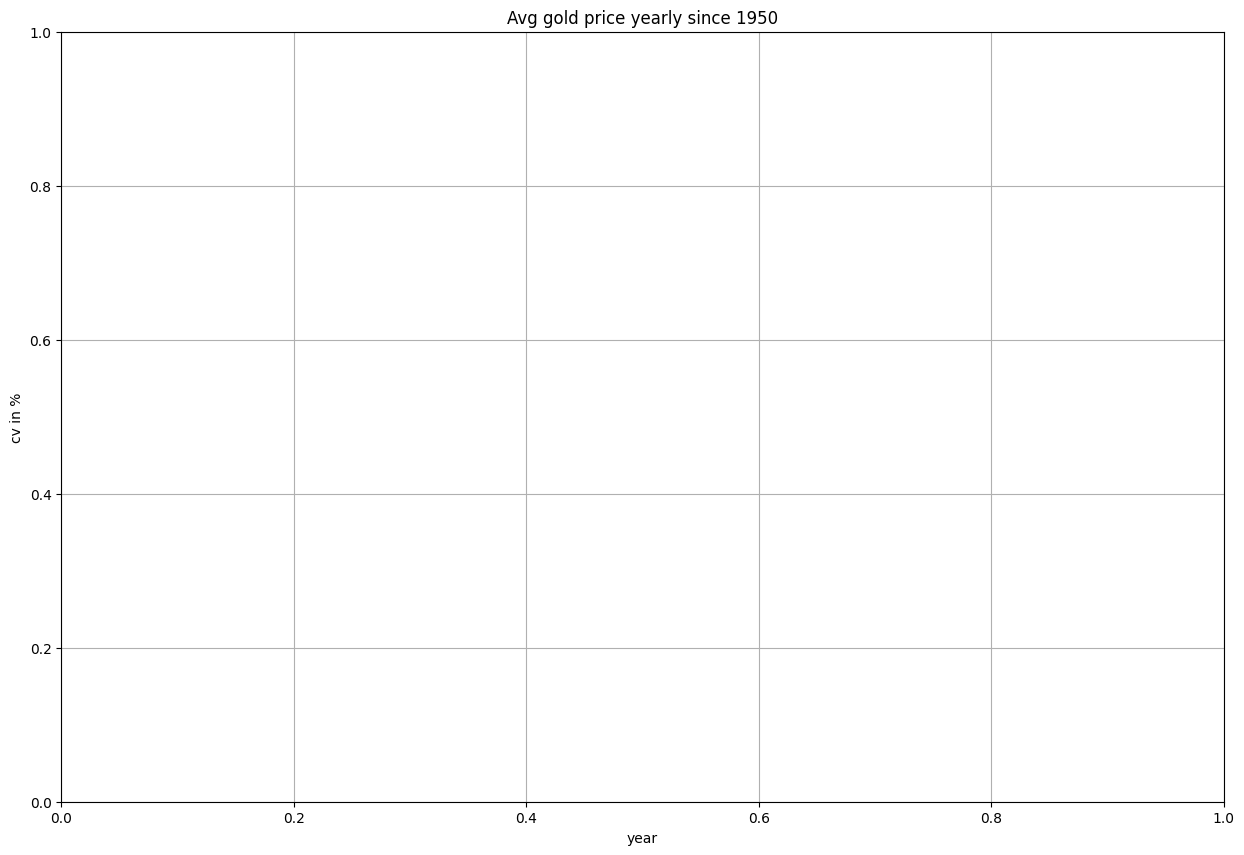

In [21]:
fig, ax= plt.subplots(figsize=(15,10))

plt.title('Avg gold price yearly since 1950')
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()

In [24]:
#time series forecasting
train = df[df.index.year <= 2015]
test= df[df.index.year >2015]

In [25]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


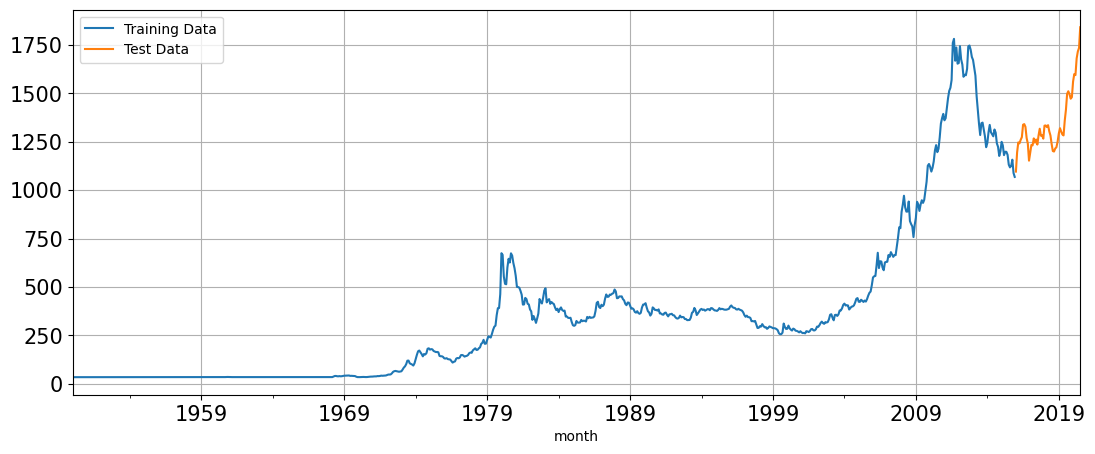

In [30]:
train["Price"].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize = (13,5),fontsize = 15)
plt.grid()
plt.legend(['Training Data','Test Data'])

In [31]:
#model formation #linear regression
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time),len(test_time)


(792, 55)

In [32]:
LR_train = train.copy()
LR_test = test.copy()

In [33]:
LR_train['time']=train_time
LR_test['time']=test_time

In [35]:
lr = LinearRegression()
lr.fit(LR_train[['time']],LR_train["Price"].values)

LinearRegression()

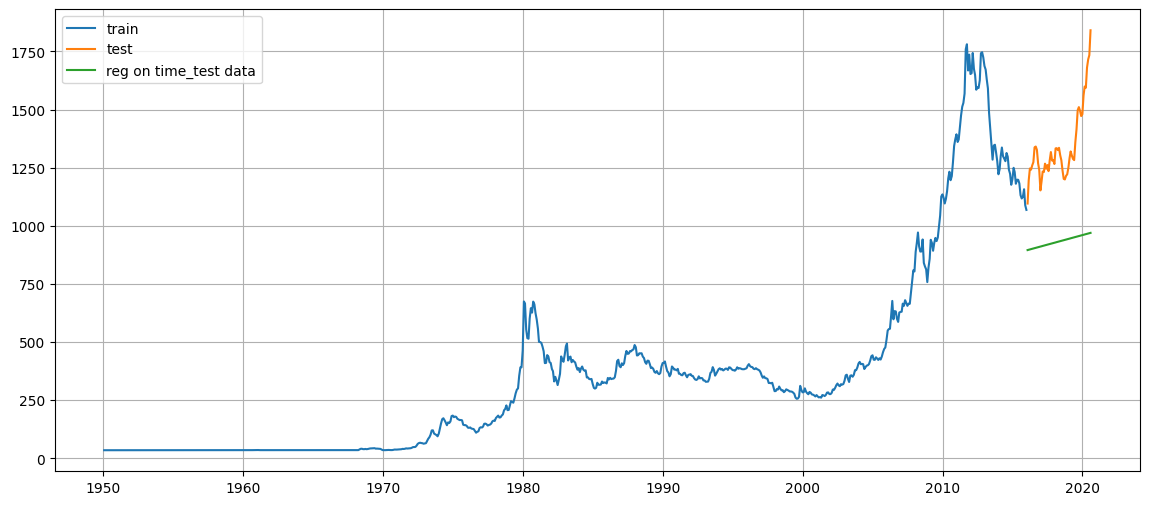

In [37]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'],label = 'train')
plt.plot(test["Price"],label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [44]:
def mape(actual, pred):
  return round((np.mean(abs(actual - pred)/ actual))*100,2)

In [45]:
mape_model1_test = mape(test['Price'].values,test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [46]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]},index=["RegressionTime"])
results

,Test Mape (%)
RegressionTime,29.76


In [47]:
Naive_train = train.copy()
Naive_test = test.copy()

In [48]:
Naive_test['Naive']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['Naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: Naive, dtype: float64

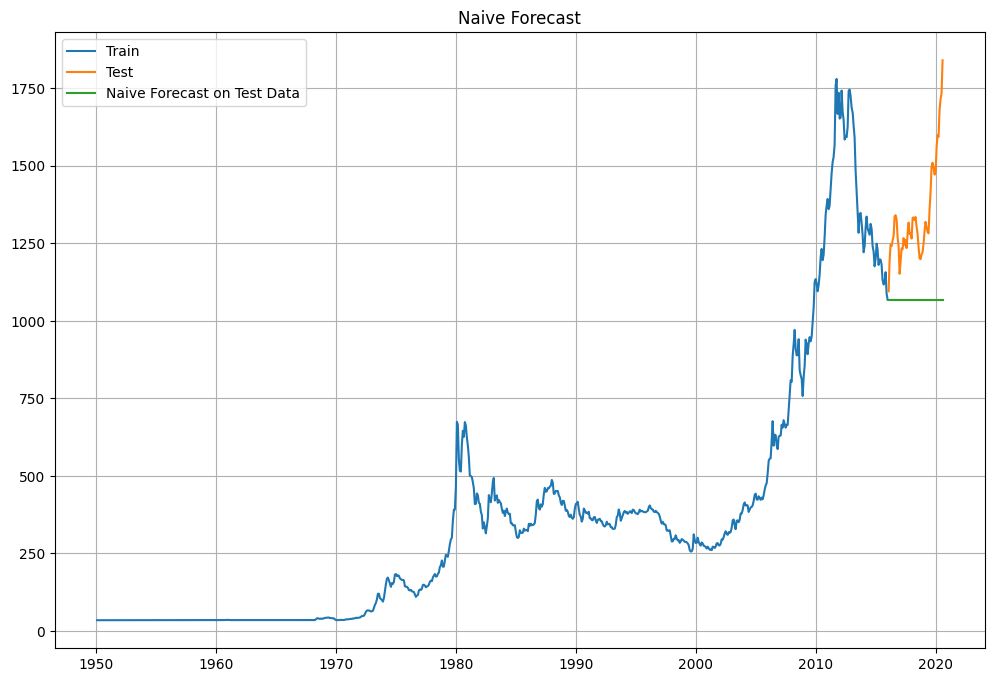

In [51]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label='Train')
plt.plot(test['Price'],label = 'Test')
plt.plot(Naive_test['Naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid()

In [52]:
mape_model2_test = mape(test['Price'].values,Naive_test['Naive'].values)
print("For Naive forecast on the Test Data, MAPE is %3.3f" %(mape_model2_test),"%")


For Naive forecast on the Test Data, MAPE is 19.380 %


In [54]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]},index=['NaiveModel'])
results = pd.concat([results, resultsDf_2])
results

,Test Mape (%),Test MAPE (%)
RegressionTime,29.76,NaN
NaiveModel,NaN,19.38
NaiveModel,NaN,19.38


In [55]:
#final forecasting
final_model = ExponentialSmoothing(df,
                                   trend = 'additive',
                                   seasonal = 'additive').fit(smoothing_level = 0.4,
                                                              smoothing_trend=0.3,
                                                              smoothing_seasonal = 0.6)

In [57]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [60]:
predictions = final_model.forecast(steps=len(test))

In [64]:
#95% of confidence interval value
pred_df = pd.DataFrame({
    'lower_CI':predictions - 1.96*np.std(final_model.resid, ddof=1),
    'prediction': predictions,
    'upper_CI': predictions + 1.96%np.std(final_model.resid,ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.720065,1792.871037,1794.831037
2020-09-30,1615.306077,1723.457050,1725.417050
2020-10-31,1538.567922,1646.718895,1648.678895
2020-11-30,1476.758600,1584.909572,1586.869572
2020-12-31,1459.327290,1567.478262,1569.438262


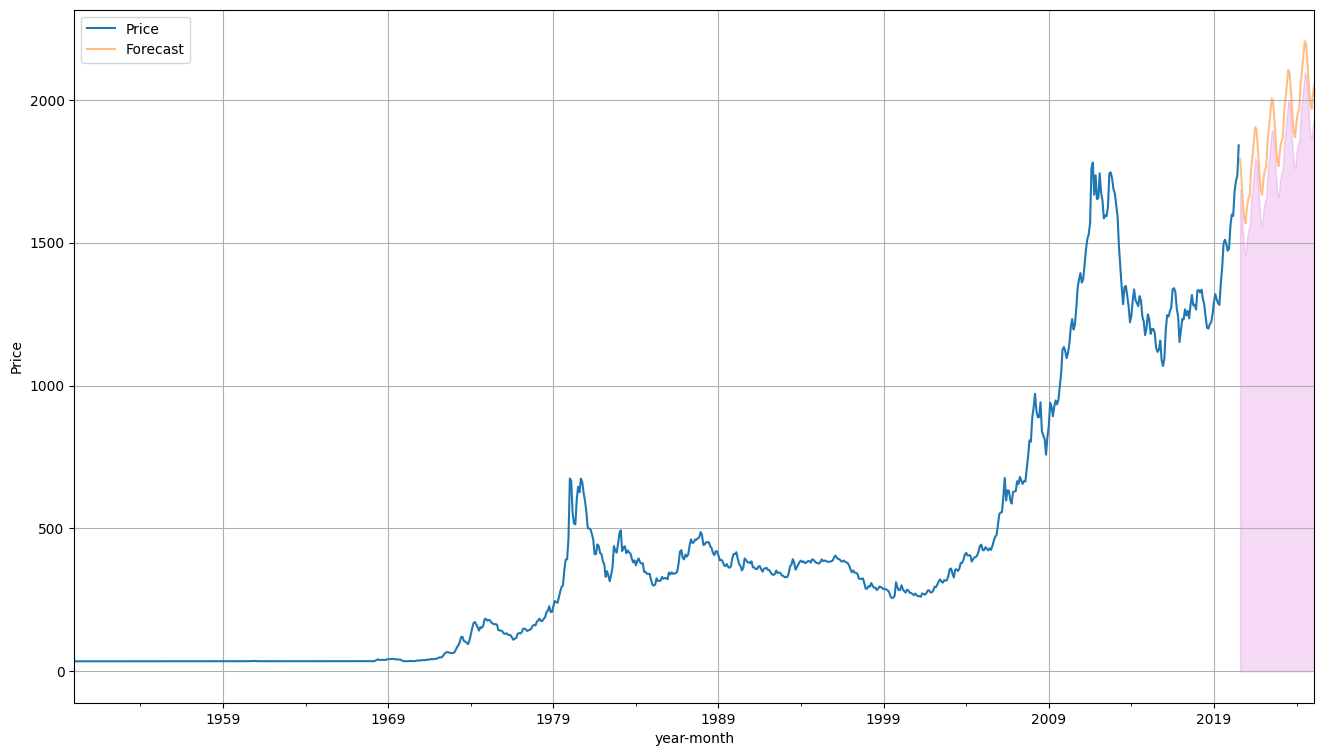

In [67]:
axis = df.plot(label = 'Actual', figsize=(16,9))
pred_df['prediction'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(pred_df.index,pred_df['lower_CI'], color = 'm', alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('Price')
plt.legend(loc = 'best')
plt.grid()
plt.show()